# Ejercicio k-Nearest Neighbor

## App Reviews
En este ejercicio vas a trabajar con una base de datos de reviews de una aplicación. Entre los datos podemos encontrar el texto de la review, las estrellas, así como el sentimiento del comentario (si es algo bueno o malo).

El objetivo es montar un algoritmo de clasificación que prediga el rating, en función del sentimiento del comentario y la cantidad de palabras empleadas en el mismo. Para ello tendrás que utilizar un algoritmo de tipo KNN.

## Importamos las librerías que vamos a utilizar

In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

## Leemos nuestro archivo de entrada `reviews_sentiment`

In [229]:
df = pd.read_csv('data/reviews_sentiment.csv', sep=";")
df.head()

,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Sin conexión,Hola desde hace algo más de un mes me pone sin...,23,negative,negative,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20,negative,negative,1,-0.586187
2,Es muy buena lo recomiendo,Andres e puto amoooo,4,NaN,negative,1,-0.602240
3,Version antigua,Me gustana mas la version anterior esta es mas...,17,NaN,negative,1,-0.616271
4,Esta bien,Sin ser la biblia.... Esta bien,6,negative,negative,1,-0.651784


Para facilitar el ejercicio, las columnas que utilizaremos serán: wordcount con la cantidad de palabras utilizadas y sentimentValue con un valor entre -4 y 4 que indica si el comentario fue valorado como positivo o negativo

Nuestras etiquetas, serán las estrellas que dieron los usuarios a la app, que son valores discretos del 1 al 5

In [230]:
#Nombres de columna en minúscula
df= df.rename(columns=str.lower)

In [231]:
#Nombres de columnas sin espacios
df.columns = df.columns.str.replace(' ', '')

Creamos dataframe solo con las columnas que nos han dicho que utilizaremos

In [232]:
df1 = df.select_dtypes(include='number')

Verificamos si hay que ajustar los valores de la columna sentimentvalue

In [233]:
df1['sentimentvalue'].describe()

count    257.000000
mean       0.383849
std        0.897987
min       -2.276469
25%       -0.108144
50%        0.264091
75%        0.808384
max        3.264579
Name: sentimentvalue, dtype: float64

## Rápidas visualizaciones y análisis
Al menos realiza un análisis univariante y representa la distribución del rating

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewtitle     257 non-null    object 
 1   reviewtext      257 non-null    object 
 2   wordcount       257 non-null    int64  
 3   titlesentiment  231 non-null    object 
 4   textsentiment   257 non-null    object 
 5   starrating      257 non-null    int64  
 6   sentimentvalue  257 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 14.2+ KB


In [235]:
df.describe()

,wordcount,starrating,sentimentvalue
count,257.000000,257.000000,257.000000
mean,11.501946,3.420233,0.383849
std,13.159812,1.409531,0.897987
min,1.000000,1.000000,-2.276469
25%,3.000000,3.000000,-0.108144
50%,7.000000,3.000000,0.264091
75%,16.000000,5.000000,0.808384
max,103.000000,5.000000,3.264579


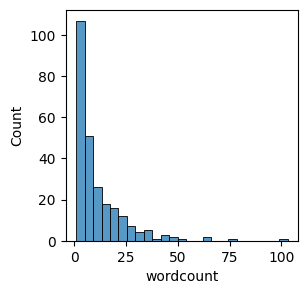

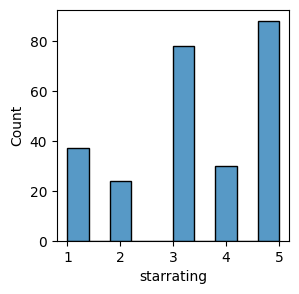

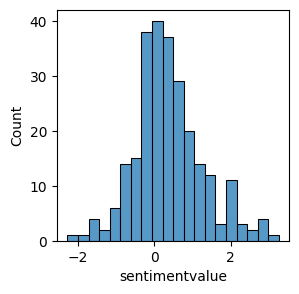

In [236]:
#Distribución de los datos en las columnas numéricas
def barras (df1):
    for col in df1.columns:
        plt.figure(figsize=(3,3))
        sns.histplot(x=col, data=df1)
        plt.show()
    return (df1)

df1 = barras(df1)

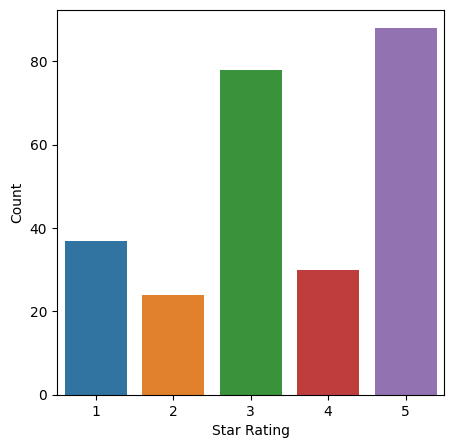

In [237]:
#Graficamos solo la distribución de starrating

plt.figure(figsize=(5,5))
sns.countplot(x='starrating', data=df1)
plt.xlabel('Star Rating')
plt.ylabel('Count');

<Figure size 500x500 with 0 Axes>

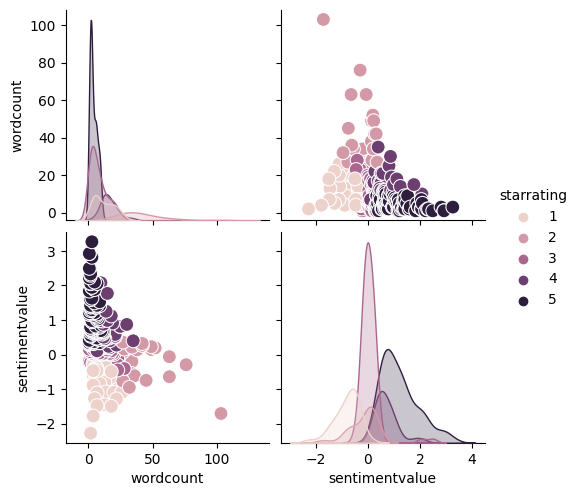

In [238]:
plt.figure(figsize=(5,5))
sns.pairplot(df1,
             kind="scatter",
             hue="starrating",
             plot_kws=dict(s=100, edgecolor="white",
                           linewidth=0.75));

## Preparamos el dataset
Divide en train/test y escala las features en el rango [0, 1].

In [239]:
#Definimos X e y
X=df1.drop('starrating', axis=1)
y=df1['starrating'].copy()

In [240]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [241]:
# unicos 
y_train.unique()

array([3, 5, 2, 4, 1], dtype=int64)

In [242]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(205, 2)
(52, 2)
(205,)
(52,)


In [243]:
from sklearn.preprocessing import MinMaxScaler

In [244]:
scaler = MinMaxScaler()

#Se aplica la escala a los datos de entrenamiento
scaler = MinMaxScaler()

# Se ajusta la escala a los datos de entrenamiento
scaler.fit(X_train)

# Se transforma X_train y X_test en base a la escala
X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)

## Creamos el Modelo
Entrena con un KNN con el parametro n_neighbors = 5 y evalúa el error en train y en test

In [245]:
from sklearn.neighbors import KNeighborsClassifier

In [246]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_transformed, y_train)

KNeighborsClassifier()

In [247]:
print('accuracy train', knn.score(X_train_transformed, y_train))
print('accuracy test', knn.score(X_test_transformed, y_test))

accuracy train 0.9170731707317074
accuracy test 0.8269230769230769


## Resultados obtenidos

In [248]:
# Escalando los datos obtenemos un mucho mejor performance (distancia entre sus vecinos en la misma escala!)

In [249]:
y_pred = knn.predict(X_test)

In [250]:
np.unique(y_pred)

array([2, 5], dtype=int64)

In [251]:
from sklearn.metrics import confusion_matrix

c_mat = confusion_matrix(y_test, y_pred)
c_mat

array([[ 0, 10,  0,  0,  0],
       [ 0,  2,  0,  0,  0],
       [ 0, 14,  0,  0,  0],
       [ 0,  7,  0,  0,  0],
       [ 0, 18,  0,  0,  1]], dtype=int64)

<AxesSubplot:>

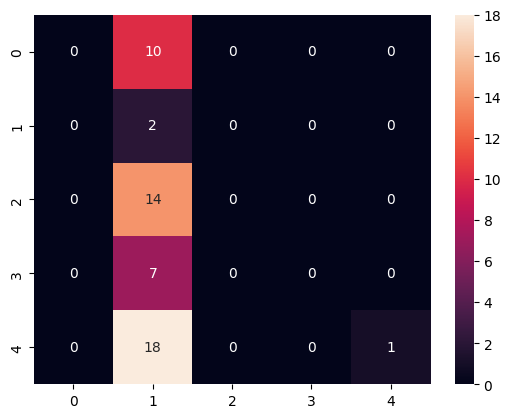

In [252]:
sns.heatmap(c_mat, annot=True)

## ¿Cómo obtener el mejor valor de k?
¿Qué valor de k maximiza el accuracy? Representa todas las iteraciones en un scatterplot -> k vs accuracy

In [253]:
k_range = range(1,40)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(k)
    knn.fit(X_train,y_train)
    scores.append(knn.score(X_test,y_test))

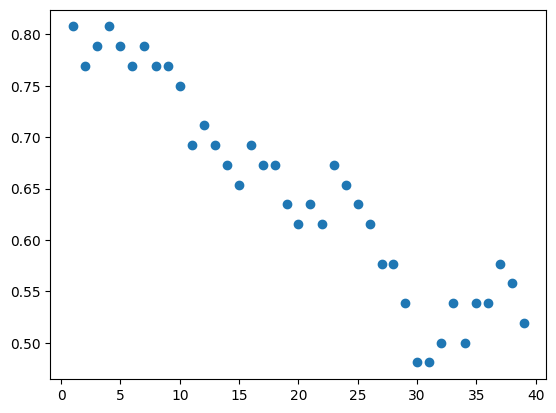

In [254]:
plt.scatter(k_range,scores);

In [255]:
np.array(k_range)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])

In [256]:
np.array(k_range)[scores == max(scores)]

array([1, 4])

## Predicciones
Ejemplo: supongamos que nos llega una review de 5 palabras y sentimiento 1

In [257]:
new = {'sentimentvalue':[1], 'wordcount':[5]}

X_pred = pd.DataFrame(new)

In [258]:
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.6730769230769231

In [259]:
prediction = knn.predict(X_pred)

In [260]:
from sklearn.model_selection import cross_val_score, KFold

In [261]:
knn = KNeighborsClassifier(n_neighbors=18)

In [262]:
kfold = KFold(10, shuffle=True)
results_cv = cross_val_score(knn, scaler.fit_transform(X), y, cv=kfold, scoring='accuracy')

In [263]:
results_cv

array([0.76923077, 0.80769231, 0.92307692, 0.88461538, 0.69230769,
       0.80769231, 0.92307692, 0.84      , 0.76      , 0.92      ])

In [264]:
results_cv.mean()

0.8327692307692308

In [265]:
results_cv.std()

0.07548517625547103